# Changes in Travel Narratives

One of the questions we might be interested in using data science for is to determine how the English language has changed. As a simple exploration of this with Python sets (and lists and strings), let's look at how language uses have possibly changed over time.

I've created a file that has the list of words used in four different English texts about travel. I have two full-length books from Project Gutenberg and two recently published articles from Intelligent Living:

* [Roughing It](http://www.gutenberg.org/cache/epub/3177/pg3177.txt), published by Mark Twain in 1872.
* [A Journey to the Western Islands of Scotland](http://www.gutenberg.org/cache/epub/2064/pg2064.txt), published by Samuel Johnson in 1775.
* [Riding High](http://intelligentlifemagazine.com/places/riding-high), a magazine travel narrative about Georgia (Asia) published in 2015 by Samantha Weinberg
* [Sunny Side Up](http://intelligentlifemagazine.com/content/places/kathleen-jamie/sunny-side), a magazine travel narrative about Scotland published in 2014 by Kathleen Jamie

I've taken these texts and stripped out all the punctuation and converted everything to uppercase. I've put these in a pickle file.

In [1]:
%matplotlib inline 
# this is some Python magic to let us draw in the notebooks

### Install third party packages

We are going to use several extensions to Python for drawing our data.

* wordcloud: this will produce wordles
* matplotlib_venn: this will draw Venn diagrams for us
* gensim: this provides some language processing tools

We will use the pip command to install the packages

#### Executing operating system commands from the notebook

In the IPython notebooks, if we start a line with an exclamation point (!), the notebook will interpret this as being a system command not a Python statement.

In [2]:
!pip install wordcloud
!pip install matplotlib_venn

    100% |████████████████████████████████| 174kB 621kB/s ta 0:00:01
  Running setup.py bdist_wheel for wordcloud ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/d9/4c/ac/e63c45f2ce09860e9459a410953039c30296e89d9f7234675f
Successfully built wordcloud


### Import packages for use

In Python ``import`` is a way to add additional functionality to our base Python system. I think this is like checking books out from a library and adding them to the books we already own.

In [3]:
import pickle
from matplotlib_venn import venn2_circles, venn2, venn3
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from gensim.models.phrases import Phrases

### Reading in our data

This is a little bit of Python magic that we are not going to explain for a while. Python has a module called ``pickle`` that allows you to store to your computer hard disk Python objects and to read them back from disk. (Pickled, as in  preserving cucumbers and onions for eating later.)

In [4]:
with open("./travel_narratives.pickle","rb") as f0:
    narratives = pickle.load(f0)

#### What does our data look like?

The data are stored in a **dictionary** with the keys and values. The values are strings containg all the text in the books or articles.

In [5]:
narratives.keys()

dict_keys(['clemens', 'johnson', 'georgia', 'scotland'])

I've saved these files as a string of text. We'll need to convert them to a **list** of words. From there, we can explore the set of words.

In Python **lists** are an ordered collection of items, not necessary unique. This differs from a set in these two ways:

1. Sets are NOT ordered, but lists are
1. Sets have only unique elments, but lists can have duplicate items.

In [6]:
type(narratives['clemens'])

str

In [7]:
narratives['clemens'].lower()[0:1000]

'1880\r\n\r\n\r\n\r\n                                   to\r\n                           calvin h  higbie \r\n                             of california \r\n        an honest man  a genial comrade  and a steadfast friend \r\n                         this book is inscribed\r\n                             by the author \r\n                     in memory of the curious time\r\n                              when we two\r\n                    were millionaires for ten days \r\n\r\n\r\n\r\n\r\n                              roughing it\r\n\r\n                                   by\r\n                              mark twain \r\n                           samuel l  clemens  \r\n\r\n\r\n\r\n                               prefatory \r\n\r\nthis book is merely a personal narrative  and not a pretentious history\r\nor a philosophical dissertation  it is a record of several years of\r\nvariegated vagabondizing  and its object is rather to help the resting\r\nreader while away an idle hour than affli

In [8]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [9]:
clemens_words = TextBlob(narratives['clemens'].lower()).words
# this splits the words on "white spaces" like spaces, tabs, etc.

#### How many words are in Mark Twain's book

In [13]:
len(clemens_words)

174088

### Now create a set from the words in the book

In [14]:
clemens_set = set(clemens_words)


### Repeat for the other texts

In [15]:
johnson_words = TextBlob(narratives['johnson'].lower()).words
johnson_set = set(johnson_words)

scotland_words = TextBlob(narratives['scotland'].lower()).words
scotland_set = set(scotland_words)

georgia_words = TextBlob(narratives['georgia'].lower()).words
georgia_set = set(georgia_words)


### Questions we might ask

#### Has our vocabulary gotten smaller over the years? 

* The English language keeps getting bigger with time as we
    1. borrow words from other languages (canyon is an example from Spanish)
    2. create words to describe new objects or phenomena (e.g. texting)
* So we might expect newer publications to have more unique words as there are more words to choose from.

#### Have we dumbed down our publications?

* In the distant past reading and writing were limited to the cultural elites where the writer might assume that the reader shared a common education of classical history and Greek and Latin, for example. Now we have democratized education and there is an impetus to write for a less educated reader. (An eight grade reading level is assumed for many consumer-legal documents.)

* If we are writing for a less educated reader, then our number of unique words would be fewer.

#### What would we need to control for in comparing these sets?

* These documents are of drastically different length. The longer the text is the more likely a unique word will be used.

#### How many total words are in the documents?

In [16]:
print(len(clemens_words),len(johnson_words),
      len(scotland_words),len(georgia_words),)

174088 59880 3528 3647


#### How many unique words are in the documents?

* Remember **elements** of a set are unique

In [17]:
print(len(clemens_set),len(johnson_set),
      len(scotland_set),len(georgia_set))

13655 6778 1199 1262


#### Would the ratio of number of words to number of unique words be meaningful?

In [18]:
print(len(clemens_words)/len(clemens_set),
      len(johnson_words)/len(johnson_set),
      len(scotland_words)/len(scotland_set),
      len(georgia_words)/len(georgia_set))

12.749029659465398 8.834464443788729 2.9424520433694745 2.8898573692551506


#### Results and Discussions

* Clemens uses the fewest number of unique words (roughly only one unique word for every 13 words in the text).
* The magazine articles have the most unique words (roughtly one unique word for every three words in the text).
* Are the magazine articles so much shorter that it is not a fair comparison?



### Forgeting Georgia for now

#### What words occur in Johnson but not in Clemens?
#### What word occur in Clemens but not in Johnson?
#### What words occur in the modern article about Scotland but not Johnson?

#### Let's start off with a Venn diagram

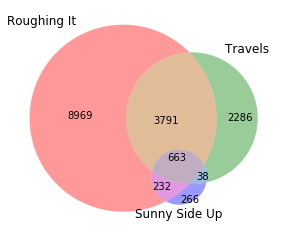

In [19]:
venn3([clemens_set, johnson_set, scotland_set],
      ("Roughing It","Travels","Sunny Side Up"))

### Set Difference Operators

* We can use the difference operators of sets to create new sets that occur only in one set and not the other.

* Recall:

The relative complement (**difference**) of $B$ with respect to $A$ is the set of all elements in $A$ that are not in $B$. This is denoted by 
$A\setminus B = \{x: x\in A, x\notin B\}$


In [21]:
johnson_not_clemens=johnson_set.difference(clemens_set)
clemens_not_johnson = clemens_set.difference(johnson_set)
scotland_not_johnson = scotland_set.difference(johnson_set)
scotland_not_johnson_not_clemens = scotland_set.difference(johnson_set.union(clemens_set))

In [22]:
from collections import Counter

### What are some of the sources of differences in the words being used?

* We might recognize right off the bat that there are different spellings between American and British English.
* There are going to be different placenames, etc.

### Using wordles to visualize the differences

### First eliminate non-informative words

Lots of words in a language don't convey much meaning. In natural language processing (computer processing of language), these are referred to as **stopwords**

In [23]:
from gensim.parsing.preprocessing import STOPWORDS
STOPWORDS= frozenset([w.upper() for w in STOPWORDS])

##### Here is a little Python magic using **list comprehension** to keep only unique words that are not stopwords

In [24]:
johnson_not_clemens_words = [word for word in johnson_words if word in johnson_not_clemens and 
                                                                        word not in STOPWORDS]
clemens_not_johnson_words = [word for word in clemens_words if word in clemens_not_johnson and 
                                                                        word not in STOPWORDS]

scotland_not_johnson_words = [word for word in scotland_words if word in scotland_not_johnson and 
                                                                        word not in STOPWORDS]


### Let's create the wordles

#### Remember these are words that appear in one author but not another

In [25]:
jwc = WordCloud().generate(' '.join(johnson_not_clemens_words))
cwc = WordCloud().generate(' '.join(clemens_not_johnson_words))
swc = WordCloud().generate(' '.join(scotland_not_johnson_words))


In [26]:
Counter(clemens_not_johnson_words).most_common(20)


[('t', 305),
 ('dollars', 143),
 ('around', 103),
 ('don', 98),
 ('slade', 81),
 ('virginia', 75),
 ('presently', 72),
 ('m', 70),
 ('nevada', 67),
 ('mining', 66),
 ('ll', 60),
 ('n', 59),
 ('o', 58),
 ('god', 58),
 ('mines', 58),
 ('san', 56),
 ('mormon', 56),
 ('francisco', 56),
 ('sort', 56),
 ('california', 55)]

(-0.5, 399.5, 199.5, -0.5)

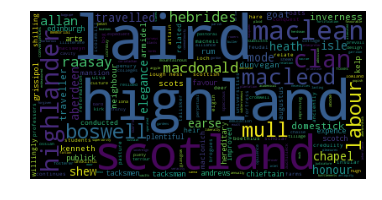

In [27]:
plt.imshow(jwc)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

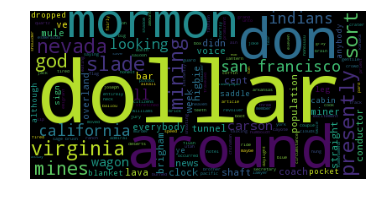

In [28]:
plt.imshow(cwc)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

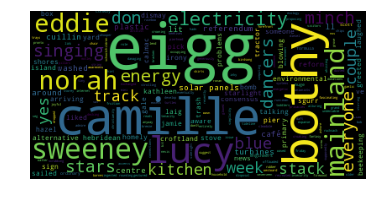

In [29]:
plt.imshow(swc)
plt.axis("off")

#### Where do you think the "T" in Clemens is coming from?

* when we strip out the punctuation words like "don't" become "don t"
* Can we conclude that Clemens wrote in a more informal style than Johnson with lots of contractions?
    * Note that "T" also appears in the modern Scotland article comparison against Johnson

#### Anything else that jumps out to you?

* "Mormon" and "Mormons" in Clemens
    * Should these be treated as different words really?
* Obvious differences in place names, but also subjects like "mining," "sage brush", "laird" and "clans"
* Look at the creation of new words for new ideas when comparing the new and old Scotland article:
    * electricity, plastic, referendum